# Data Exploration: Binary Classification of Insurance Cross Selling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
insurance_train_path = 'data/train.csv'
insurance_train_df = pd.read_csv(insurance_train_path,index_col=None)
insurance_train_df.columns= insurance_train_df.columns.str.lower()
insurance_train_df.columns = insurance_train_df.columns.str.replace(' ','_')

In [3]:
insurance_train_df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


### Statistics for the dimensions

In [4]:
categorical_statistics = insurance_train_df.astype('object').describe()
categorical_statistics

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,11504798,11504798,11504798,11504798,11504798.0,11504798,11504798,11504798,11504798.0,11504798.0,11504798,11504798
unique,11504798,2,66,2,54.0,2,3,2,51728.0,152.0,290,2
top,11504797,Male,24,1,28.0,0,1-2 Year,Yes,2630.0,152.0,187,0
freq,1,6228134,815884,11482041,3451062.0,6178116,5982678,5783229,2112561.0,4166183.0,98018,10089739


### Statistics for the metrics

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
numerical_columns = ["age","response","annual_premium"]
insurance_train_df[numerical_columns].describe()

,age,response,annual_premium
count,"11,504,798.00","11,504,798.00","11,504,798.00"
mean,38.38,0.12,"30,461.37"
std,14.99,0.33,"16,454.75"
min,20.00,0.00,"2,630.00"
25%,24.00,0.00,"25,277.00"
50%,36.00,0.00,"31,824.00"
75%,49.00,0.00,"39,451.00"
max,85.00,1.00,"540,165.00"


## Graphs

(array([3941026., 1265683., 1147450., 1498561., 1456247.,  820598.,
         680038.,  421142.,  246326.,   27727.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

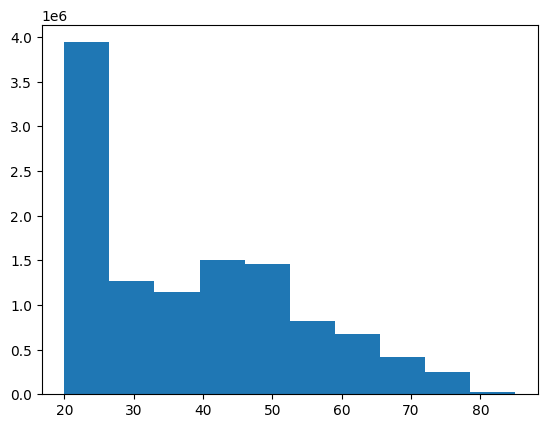

In [6]:
plt.hist(insurance_train_df["age"],label='Histogram')

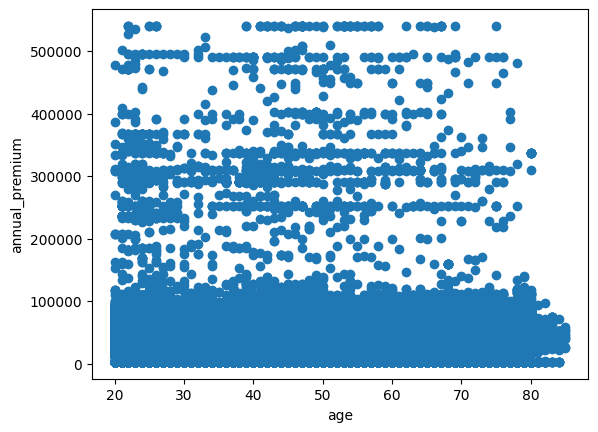

In [7]:
colors = {1: 'green', 0: 'blue'}
plt.scatter(insurance_train_df["age"],insurance_train_df["annual_premium"])
plt.xlabel('age')
plt.ylabel('annual_premium')
plt.show()

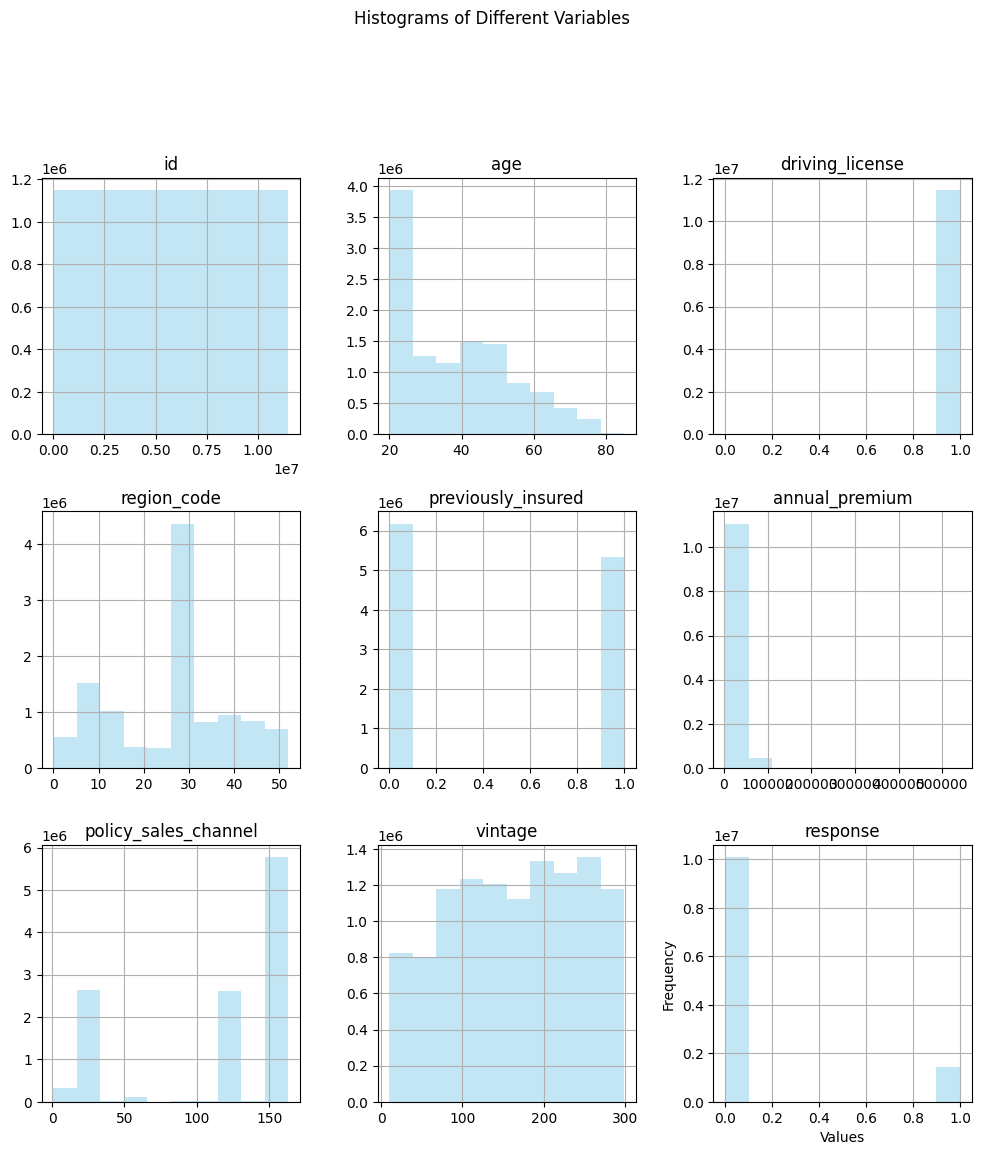

In [8]:
# Plot histograms for each variable
insurance_train_df.hist(bins=10, alpha=0.5, figsize=(12, 12), color='skyblue')

# Add labels and title
plt.suptitle('Histograms of Different Variables', y=1.02)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

([<matplotlib.axis.XTick at 0x1ae8988ff70>,
 [Text(1, 0, '1'), Text(2, 0, '0')])

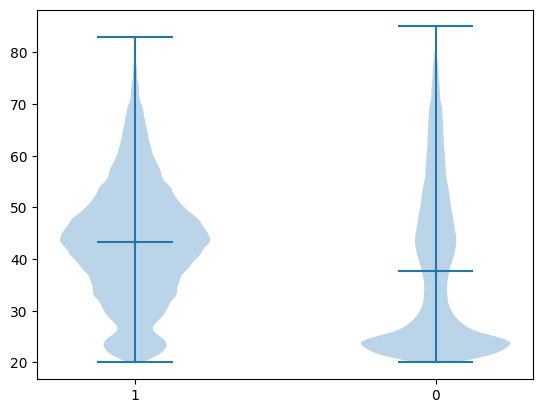

In [9]:
plt.violinplot([insurance_train_df['age'][insurance_train_df['response'] == 1], insurance_train_df['age'][insurance_train_df['response'] == 0]], showmeans=True)
# Add labels and title
plt.xticks([1, 2], ['1', '0'])

In [ ]:
# Set the style to whitegrid for better aesthetics (optional)
sns.set(style="whitegrid")
column_names = insurance_train_df.columns
# Create violin plots for each variable, categorized by "smoking"
plt.figure(figsize=(12, 12))
for i, variable in enumerate(column_names):
    plt.subplot(4, 6, i + 1)
    sns.violinplot(x='response', y=variable, data=insurance_train_df, palette='pastel', inner='quartile')

# Add labels and title
plt.suptitle('Violin Plots of Different Variables by Smoking Status', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\migue\AppData\Local\Temp\ipykernel_18696\1434219511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='response', y=variable, data=insurance_train_df, palette='pastel', inner='quartile')
C:\Users\migue\AppData\Local\Temp\ipykernel_18696\1434219511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='response', y=variable, data=insurance_train_df, palette='pastel', inner='quartile')
C:\Users\migue\AppData\Local\Temp\ipykernel_18696\1434219511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='response', y=variable,

In [ ]:
colors = {1: 'green', 0: 'blue'}
plt.scatter(insurance_train_df["age"],insurance_train_df["annual_premium"],c=insurance_train_df["response"].map(colors),s=5)
plt.xlabel('age')
plt.ylabel('annual_premium')
plt.show()